<a href="https://colab.research.google.com/github/sysbio-unam/practicas-computacionales-Python/blob/main/euler_maruyama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Título: Algoritmo de Euler Maruyama

Nombre: Biología de Sistemas UNAM

Fecha: diciembre 2021

En su aríticulo de 2002 [1], Elowitz *et al* reportan, quizá por vez primera, mediciones de los niveles de expresión de la proteína verde fluorescente (GFP, por sus siglas en inglés, *Greeen Fluorescent Protein*) de casa una de las céculas bacterianas en un cultivo celular. Estos datos les permiten construir empíricamente las distribuciones poblacionales de los niveles de expresión de la GFP. Desde entonces, se han acentuado los esfuerzos y aportaciones teóricos dirigidos a entender de *dónde surgen / emergen estas distribuciones poblacionales*. Una de las posibles fuentes de ruido / generador de variabilidad de este tipo de sistemas celulares es el **ruido intrínseco**. Este se debe a que las interacciones bioquímicas que regulan los niveles de expresión genética son procesos estocásticos. A continuación, vamos a simular este proceso estocástico de producción y decaimiento de la GFP. Para ellos, utilizaremos el algoritmo de Euler - Maruyama. 

In [3]:
# importar librerías 
import numpy as np
import matplotlib.pyplot as plt

## Descripción del proceso (en este caso, las reacciones): 
El sistema bioquímico de formación y degradación de la GFP a considerar en está dado por las reacciones representadas por:

$$
\varnothing \xrightarrow[]{k_1} \text{GFP} \xrightarrow[]{k_2}  \varnothing \tag{1}
$$

# 1. Establecer modelo y obtener estado estacionario 

## Red para describir las reacciones en las que participa la GFP

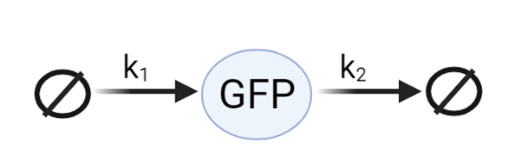

## Modelo matemático 

Realizando el balance de materia para la proteína GFP se tiene

$$
\text{cambio de concentración de la GFP} = \text{entrada de GFP} - \text{degradación de GFP} \tag{2}
$$

$$
\frac{dGFP}{dt} = k_1 s - k_2 GFP \tag{3} 
$$

En (3) se supone que la producción de GFP se realiza a una velocidad constante. Por otro lado, la degradación de la GFP se establece proporcional a su concentración.

Dado que el primer término en (3) es una constante se puede escribir como 

$$
\frac{dGFP}{dt} = p_1 - k_2 GFP \tag{4}
$$

donde $p_1 = k_1 s$

## Análisis de estabilidad 

Igualando (4) a cero y despejando de obtiene el estado estacionario.

$$
\frac{dGFP}{dt} = p_1 - k_2 GFP = 0 \rightarrow GFP_{ss} = \frac{p_1}{k_2}
$$

In [24]:
def estado_estacionario(p1 ,k2):
    return p1/k2

In [25]:
p1 = 1 
k2 = 1
ss = estado_estacionario(1,1)
print(ss)

1.0


### Método de Euler para realizar integración numérica

In [26]:
# función que describe el cambio de GFP
def dGFPdt(GFP):
    return p1 - k2 * GFP



In [29]:
# establecer condición inicial 
GFP0 = 0.1 
# establecer tamaño de paso en el método de Euler 
dt = 0.1 
# tiempo de simulación 
time = np.arange(0, 10, dt)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])

In [40]:
# método de Euler
GFP = np.zeros_like(time)
GFP[0] = GFP0
for t in range(1,len(time)):
    GFP[t] = GFP[t-1] + dGFPdt(GFP[t-1]) * dt  

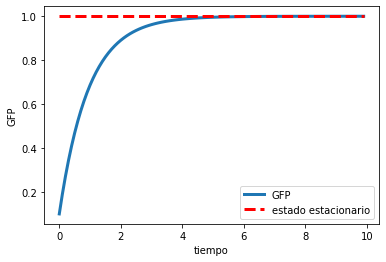

In [46]:
plt.plot(time, GFP, linewidth = 3)
plt.xlabel("tiempo")
plt.ylabel("GFP")
plt.plot(time, np.ones_like(time) * ss, "r--", linewidth = 3)
plt.legend(["GFP", "estado estacionario"])

# 2. Seleccionar estado estacionario como condición inicial 

In [47]:
# método de Euler
GFP = np.zeros_like(time)
GFP[0] = ss
for t in range(1,len(time)):
    GFP[t] = GFP[t-1] + dGFPdt(GFP[t-1]) * dt  

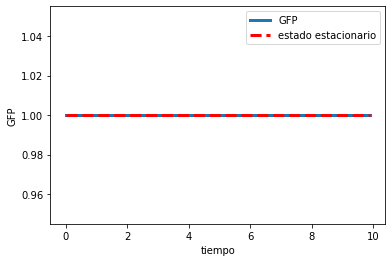

In [48]:
plt.plot(time, GFP, linewidth = 3)
plt.xlabel("tiempo")
plt.ylabel("GFP")
plt.plot(time, np.ones_like(time) * ss, "r--", linewidth = 3)
plt.legend(["GFP", "estado estacionario"])

# 3. Simular empleando el algoritmo de Euler-Maruyama

Ahora se repite la simulación empleando el método de Euler-Maruyama 

In [49]:
# simular utilizando el método de Euler-Maruyama
GFP = np.zeros_like(time)
GFP[0] = ss
for t in range(1,len(time)):
    GFP[t] = GFP[t-1] + dGFPdt(GFP[t-1]) * dt +  np.random.normal(loc = 0, scale = 0.01) # agregamos ruido normal 

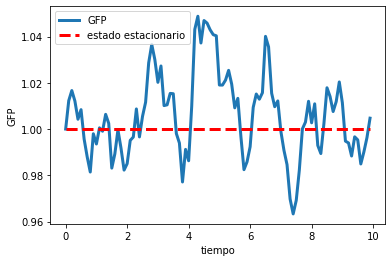

In [50]:
plt.plot(time, GFP, linewidth = 3)
plt.xlabel("tiempo")
plt.ylabel("GFP")
plt.plot(time, np.ones_like(time) * ss, "r--", linewidth = 3)
plt.legend(["GFP", "estado estacionario"])

# 4. Realizar varias repeticiones y obtener la distribucción de $GFP_{final}$

Observemos que ocurre si se realiza esta simulación varias veces  

In [52]:
# función que aplica el método de Euler-Maruyama
def Euler_Maruyama():
    GFP = np.zeros_like(time)
    GFP[0] = ss
    for t in range(1,len(time)):
        GFP[t] = GFP[t-1] + dGFPdt(GFP[t-1]) * dt +  np.random.normal(loc = 0, scale = 0.01) 
    return GFP

In [53]:
iter = 100
GFP = np.zeros((len(time), iter))

In [60]:
for i in range(iter):
    GFP[:, i] = Euler_Maruyama()

Text(0, 0.5, 'GFP')

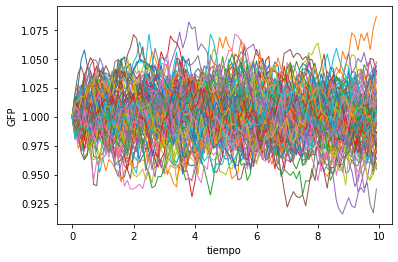

In [65]:
plt.plot(time, GFP, linewidth = 1)
plt.xlabel("tiempo")
plt.ylabel("GFP")

In [71]:
# valores finales de cada simulación 
GFP_end = GFP[iter-1, :]

Text(0, 0.5, 'frecuencia')

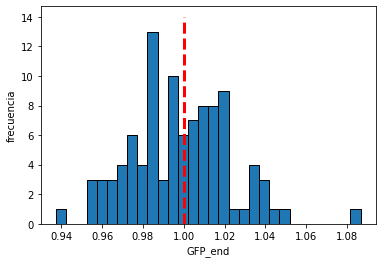

In [96]:
plt.hist(GFP_end, bins=30, edgecolor='black')
plt.plot([ss, ss], [0, 14], "r--", linewidth = 3)
plt.xlabel("GFP_end")
plt.ylabel("frecuencia")

# También es posible añadir ruido a los parámetros 

In [127]:
# simular añadiendo ruido a los parámetros
GFP = np.zeros_like(time)
GFP[0] = ss
for t in range(1,len(time)):
    k2 += np.random.normal(loc = 0, scale = 0.01) # agregamos ruido normal 
    GFP[t] = GFP[t-1] + dGFPdt(GFP[t-1]) * dt 
k2 = 1

(0.95, 1.05)

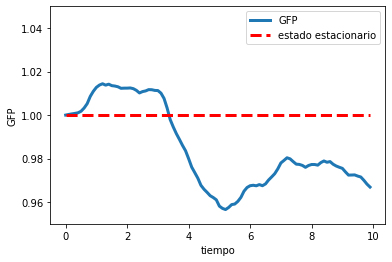

In [128]:
plt.plot(time, GFP, linewidth = 3)
plt.xlabel("tiempo")
plt.ylabel("GFP")
plt.plot(time, np.ones_like(time) * ss, "r--", linewidth = 3)
plt.legend(["GFP", "estado estacionario"])
plt.ylim([0.95, 1.05])